# BIOS512 Assignment #4

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [194]:
library('tidyverse')
library('ggplot2')
library('dplyr')
library('forcats')
turbine = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2020/2020-10-27/wind-turbine.csv')
turbine |> head()

Rows: 6698 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): province_territory, project_name, turbine_identifier, turbine_numbe...
dbl (7): objectid, total_project_capacity_mw, turbine_rated_capacity_k_w, ro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150,23,30,Bonus,AN 150/30,1993,49.52535,-114.0548,NA
2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600,44,40,Vestas,V44/600,1997,49.51264,-114.0357,NA
3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600,44,50,Vestas,V44/600,1998,49.23307,-113.6549,NA
4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600,44,50,Vestas,V44/600,1998,49.23303,-113.6302,NA
5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600,44,50,Vestas,V44/600,1998,49.21755,-113.6802,NA
6,Alberta,Waterton Wind Turbines,3.78,WWT4,4/6,660,47,50,Vestas,V47/660,2000,49.21773,-113.6579,NA


Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

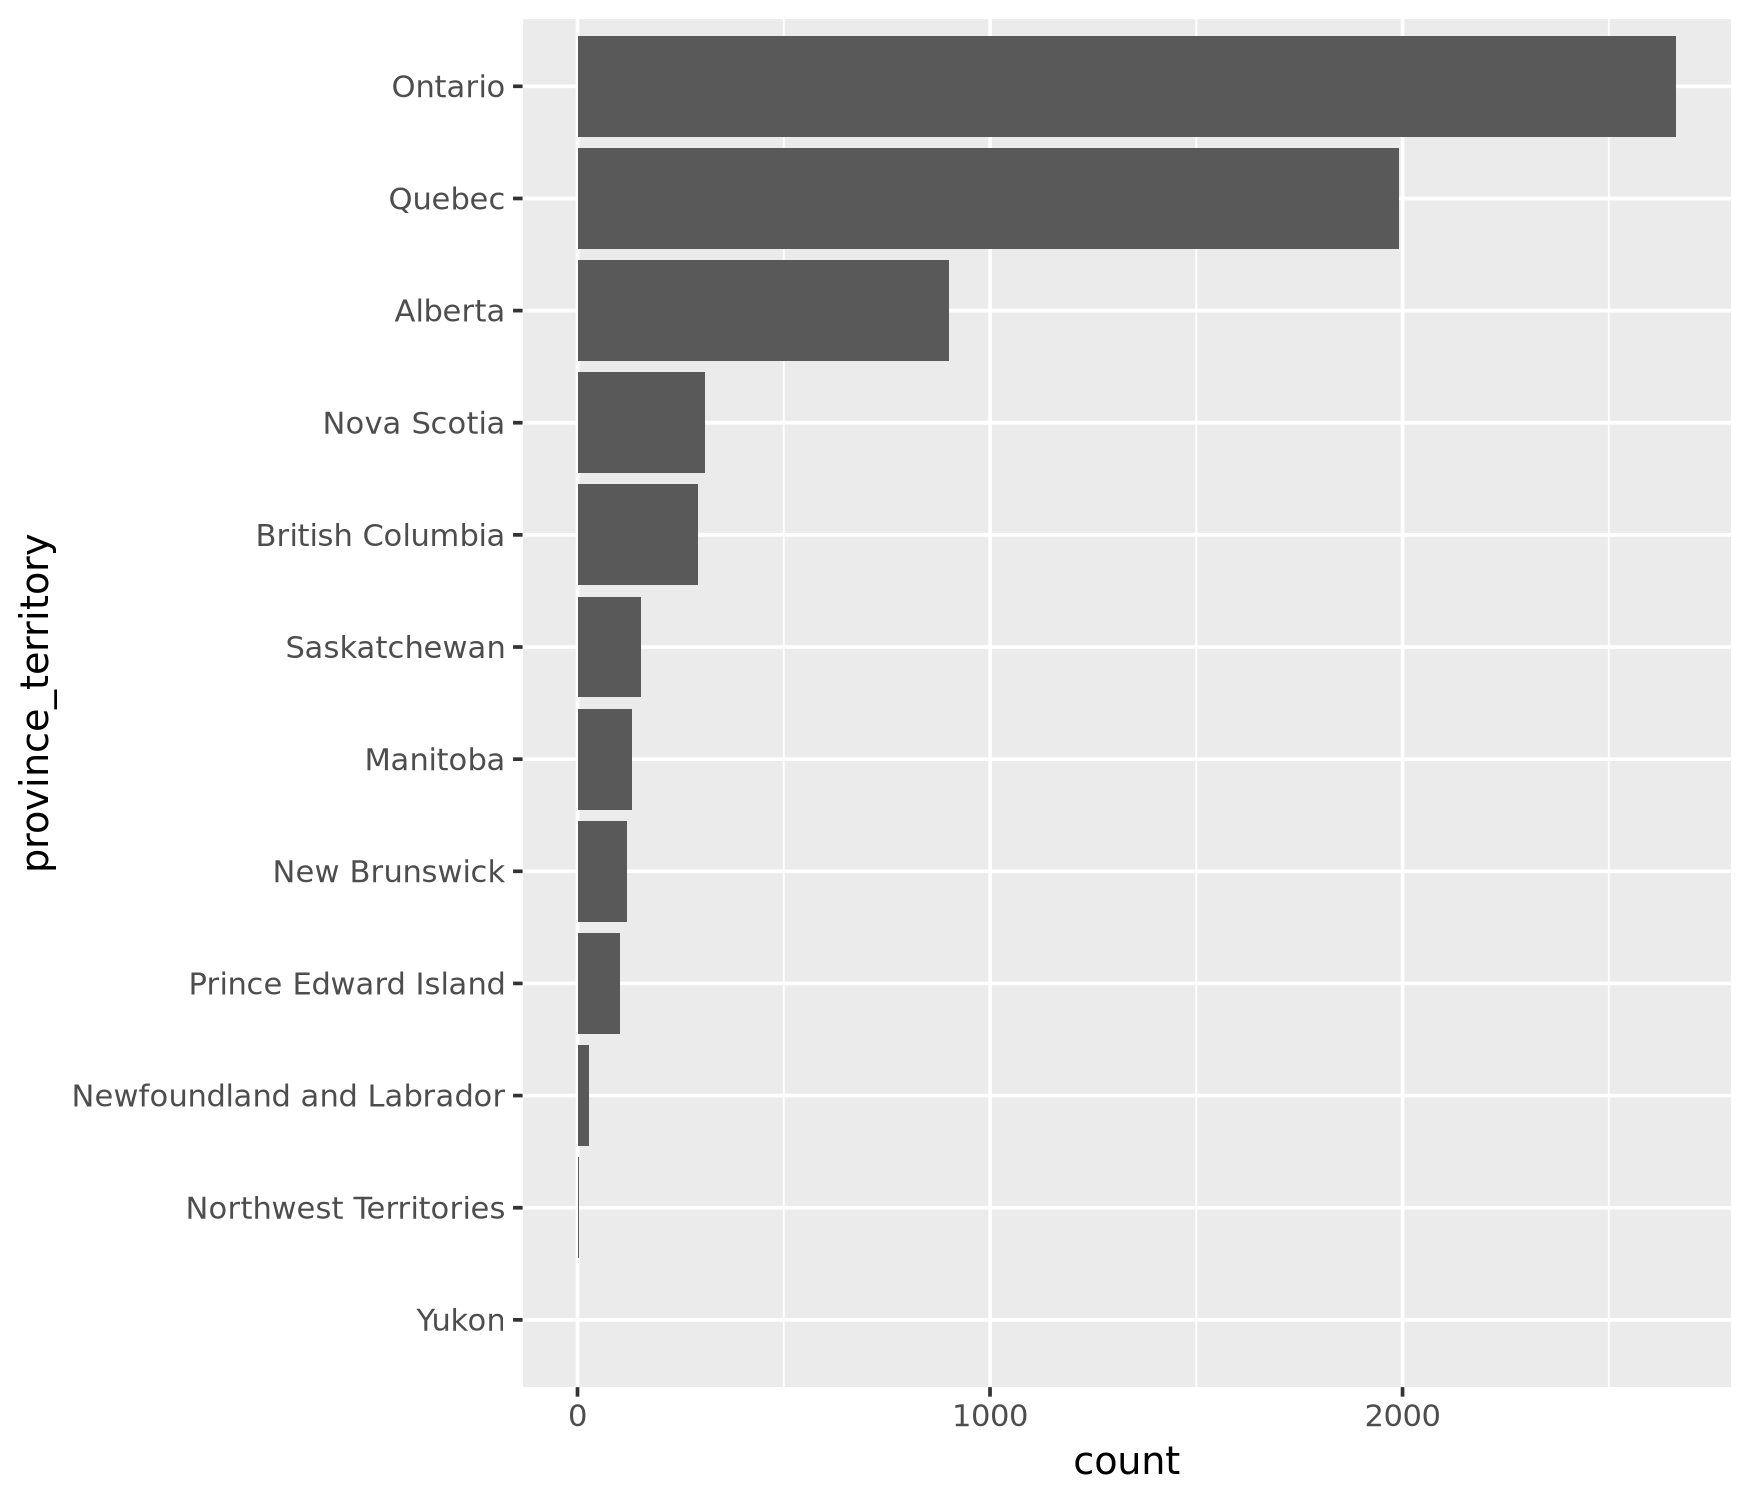

In [195]:
turbine |> 
    mutate(
        province_territory=fct_infreq(province_territory) |> fct_rev()) |> 
ggplot(aes(y=province_territory)) + 
geom_bar() 

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

In [196]:
df = read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2020/2020-10-27/wind-turbine.csv', 
col_types = cols()
)

df |> head()

objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150,23,30,Bonus,AN 150/30,1993,49.52535,-114.0548,NA
2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600,44,40,Vestas,V44/600,1997,49.51264,-114.0357,NA
3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600,44,50,Vestas,V44/600,1998,49.23307,-113.6549,NA
4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600,44,50,Vestas,V44/600,1998,49.23303,-113.6302,NA
5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600,44,50,Vestas,V44/600,1998,49.21755,-113.6802,NA
6,Alberta,Waterton Wind Turbines,3.78,WWT4,4/6,660,47,50,Vestas,V47/660,2000,49.21773,-113.6579,NA


In [207]:
df_sorted = df %>%
    mutate(man_sorted = manufacturer %>% fct_infreq() %>% fct_rev())  # try with fct_rev

p = ggplot(df_sorted, aes(x = man_sorted))

p = p + geom_bar() + coord_flip()

In [198]:
df %>% 
    pull(manufacturer) %>%
    fct_infreq() %>%
    fct_rev() %>%
    levels()

[1] "Tacke"                    "Pfleiderer"              
 [3] "Leitwind"                 "Lagerwey"                
 [5] "EWT"                      "Bonus"                   
 [7] "Turbowinds"               "Northwind"               
 [9] "Samsung Renewable Energy" "DeWind"                  
[11] "Windmatic"                "Gamesa"                  
[13] "Vensys"                   "Suzlon"                  
[15] "Nordex"                   "Acciona"                 
[17] "Acciona Wind Power"       "NEG Micon"               
[19] "Senvion"                  "Enercon"                 
[21] "Siemens"                  "GE"                      
[23] "Vestas"

In [208]:
df_sorted = df %>%
    group_by(manufacturer) %>%
    mutate(n = n()) %>%
    ungroup() %>% # Why do we need to ungroup?
    arrange(n) %>%
    mutate(man_sorted = fct_inorder(manufacturer))
           
p = ggplot(df_sorted, aes(x = man_sorted))

p = p + geom_bar() + coord_flip()

In [200]:
df %>% print

# A tibble: 6,698 × 15
   objectid province_territory project_name           total_project_capacity_mw
      <dbl> <chr>              <chr>                                      <dbl>
 1        1 Alberta            Optimist Wind Energy                        0.9 
 2        2 Alberta            Castle River Wind Farm                     44   
 3        3 Alberta            Waterton Wind Turbines                      3.78
 4        4 Alberta            Waterton Wind Turbines                      3.78
 5        5 Alberta            Waterton Wind Turbines                      3.78
 6        6 Alberta            Waterton Wind Turbines                      3.78
 7        7 Alberta            Cowley North                               19.5 
 8        8 Alberta            Cowley North                               19.5 
 9        9 Alberta            Cowley North                               19.5 
10       10 Alberta            Cowley North                               19.5 
# ℹ 6,688 more ro

In [209]:
df_lumped = df %>%
    mutate(man_lumped = manufacturer %>% fct_lump(n = 7)) # add fct_infreq and fct_rev

p = ggplot(df_lumped, aes(y = man_lumped))

p = p + geom_bar()

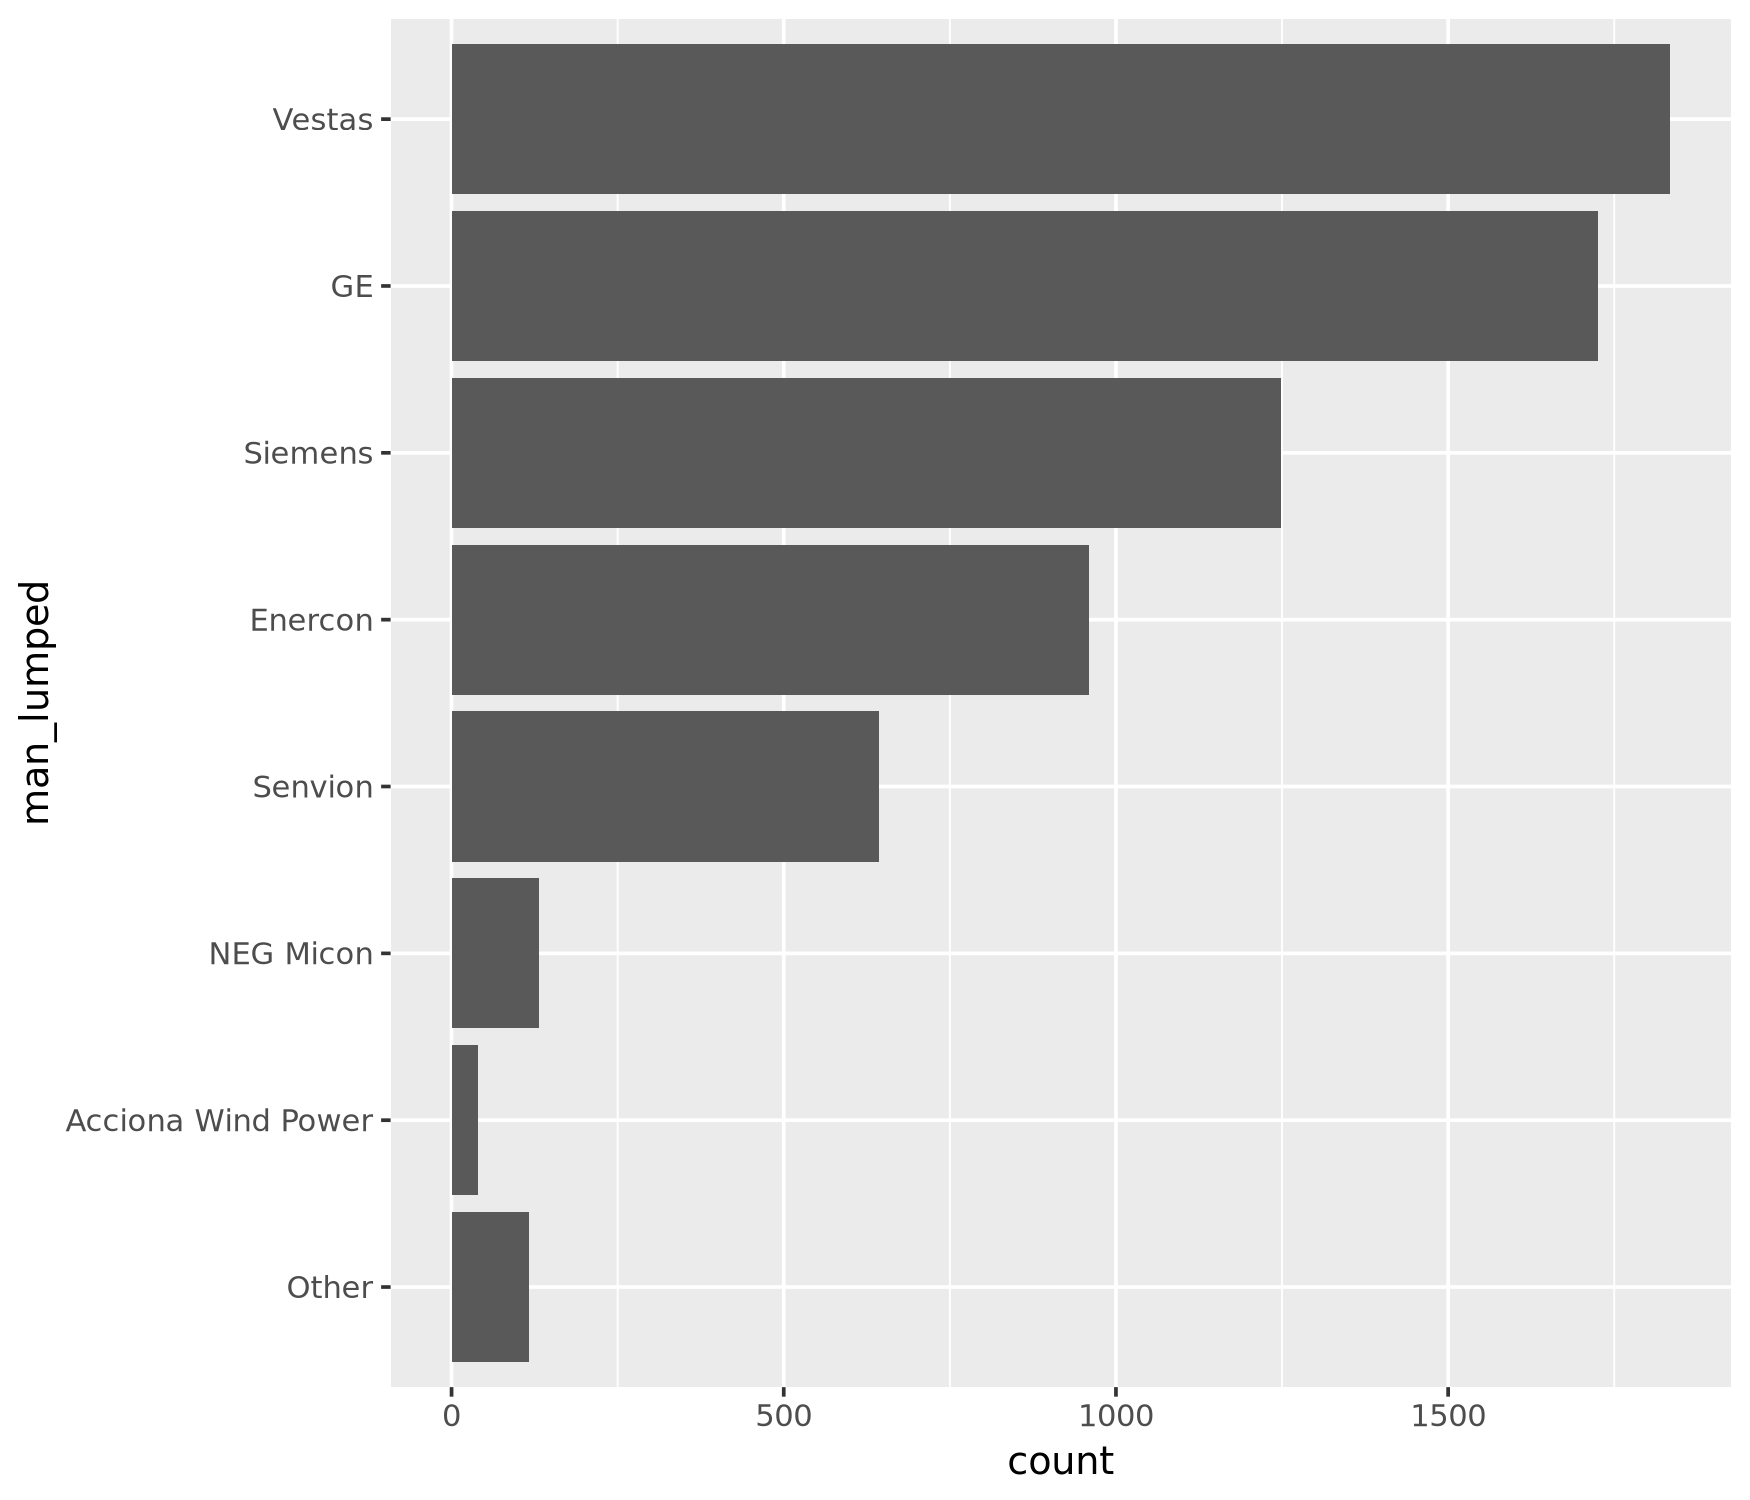

In [210]:
df_lumped = df %>%
    mutate(man_lumped = manufacturer %>% 
           fct_lump(n = 7) %>% 
           fct_infreq() %>% 
           fct_relevel('Other', after= Inf) %>%
           fct_rev()
    )

p = ggplot(df_lumped, aes(y = man_lumped))

p = p + geom_bar()

p

Let's make a map of where each turbine is located. 🗺️

In the cell below ⬇️ load the `mapdata` package.

In [203]:
library('mapdata')

Now we can retrieve the "data" for a map of Canada. Run this code:

In [204]:
canada = map_data('world', region='Canada')  
canada |> head()


,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,-59.78760,43.93960,1,1,Canada,Sable Island
2,-59.92227,43.90391,1,2,Canada,Sable Island
3,-60.03775,43.90664,1,3,Canada,Sable Island
4,-60.11426,43.93911,1,4,Canada,Sable Island
5,-60.11748,43.95337,1,5,Canada,Sable Island
6,-59.93604,43.93960,1,6,Canada,Sable Island


Are the column names for `latitude` and `longitude` the same for your Canada map data and the turbine data?

No, they are 'latitude' and 'longitude' vs "lat" and 'long'

The code below creates a map of Canada. Modify the code to add the turbine locations. 

❗️ **Hint:** use `geom_point`. Remember to, 
1. define encodings inside of `geom_point` that work for the **turbine data**, and
2. to override the data in `geom_point` to use the **turbine data** instead of the **Canada map data**. ❗️

[This](https://github.com/chuckpr/BIOS512/blob/main/assignments/2024/map.png?raw=true) is what the map should look like...

In [205]:
turbine |> select(province_territory, latitude, longitude)  |> 
head()


province_territory,latitude,longitude
<chr>,<dbl>,<dbl>
Alberta,49.52535,-114.0548
Alberta,49.51264,-114.0357
Alberta,49.23307,-113.6549
Alberta,49.23303,-113.6302
Alberta,49.21755,-113.6802
Alberta,49.21773,-113.6579


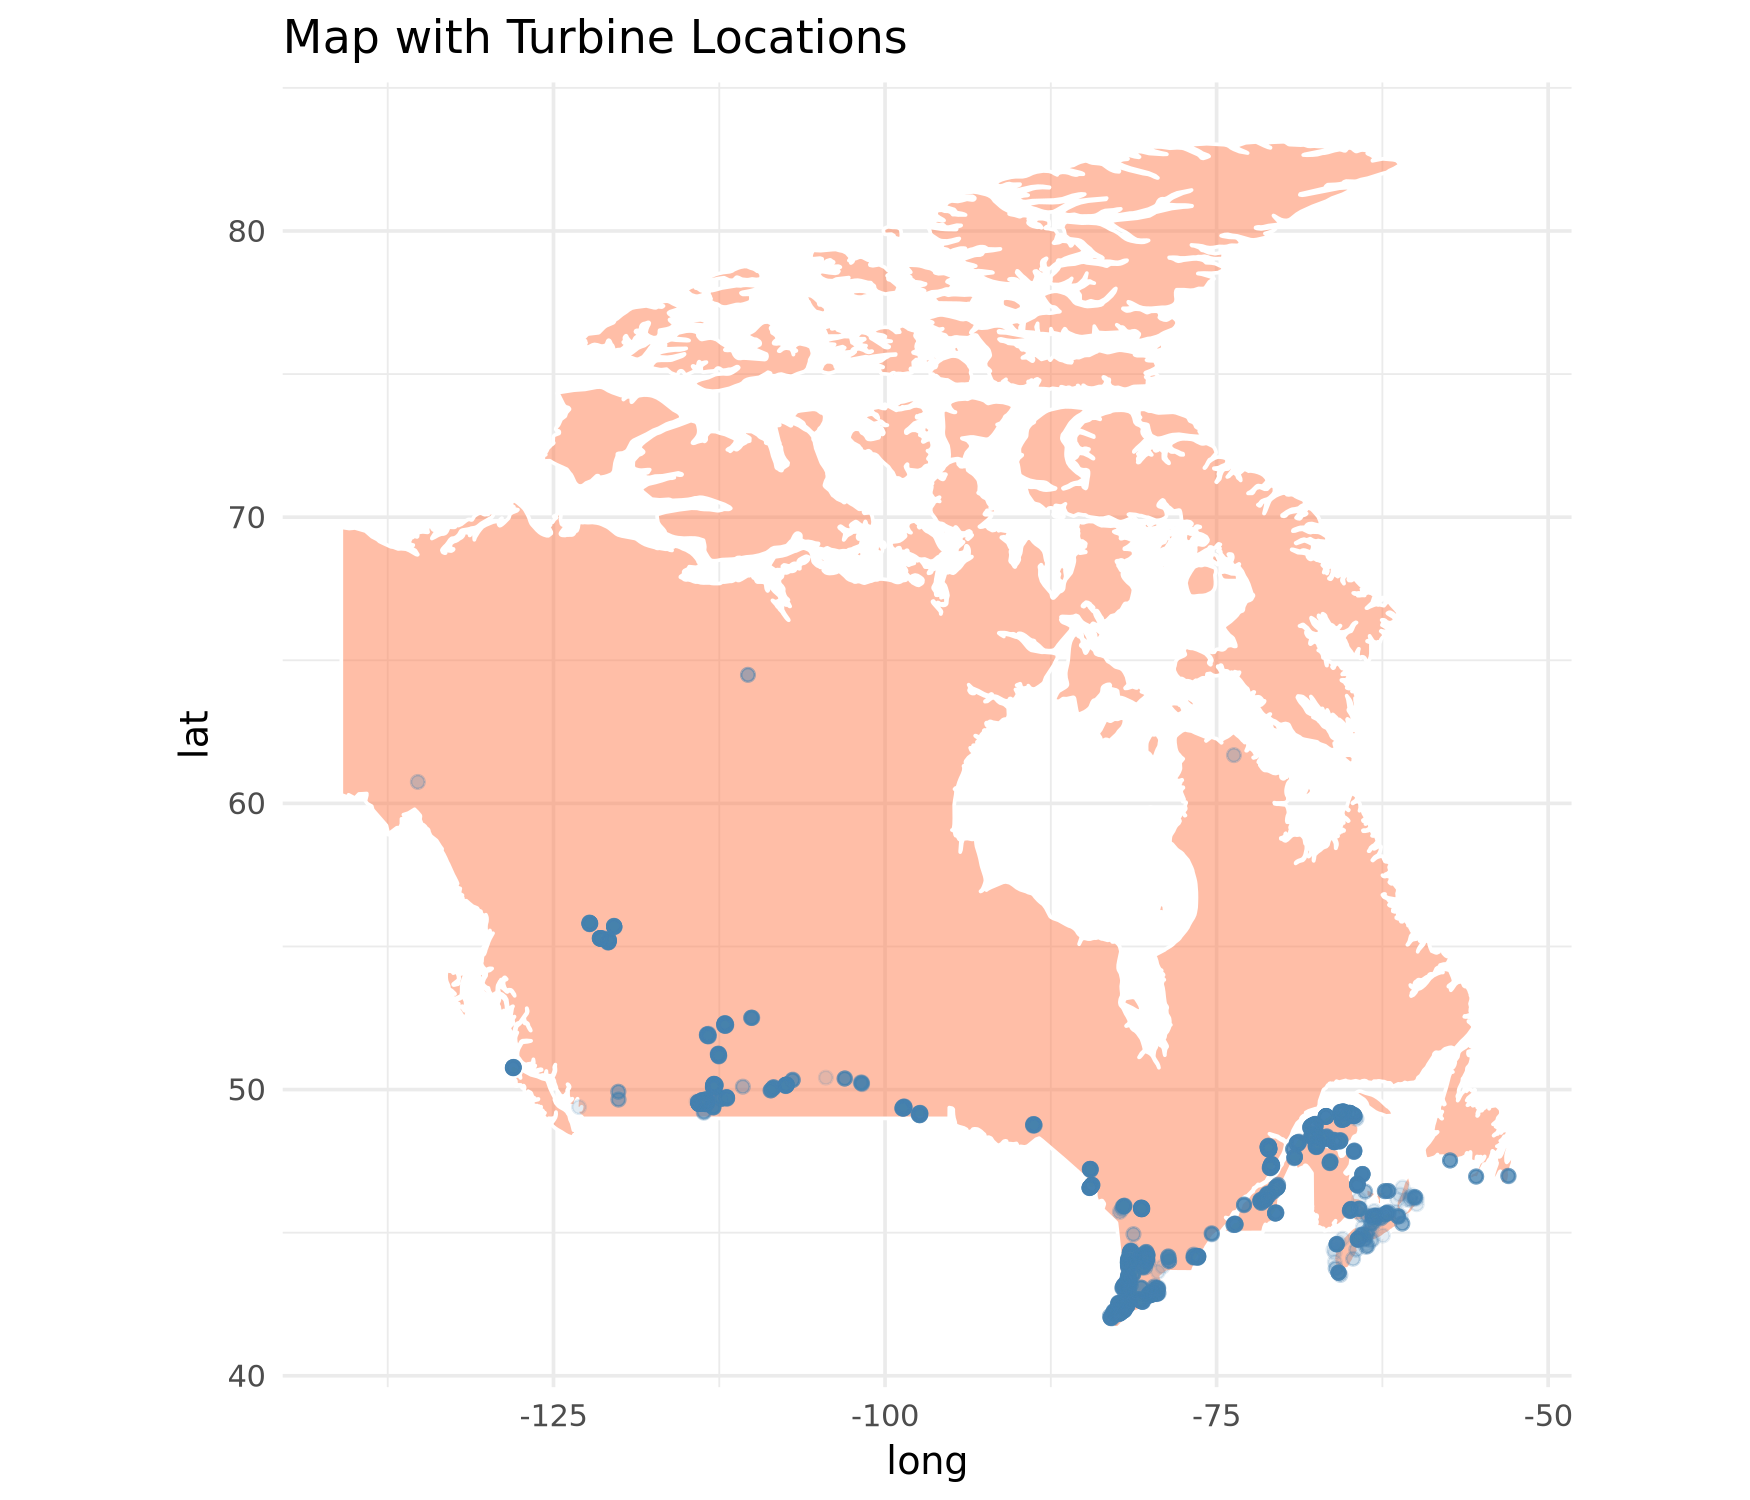

In [206]:
ggplot(data = canada) + 
    geom_polygon(aes(x = long, y = lat, group = group), fill = 'coral', color = "white", alpha = 0.5) + 
    coord_quickmap() +
    geom_point(data = turbine, aes(x=longitude,y=latitude), color = "steel blue", size = 1.5, alpha=0.15) +  
  theme_minimal() +
  labs(title = "Map with Turbine Locations")


# you'll have the change the encoding of the columns if it doesn't look right 